# Edge detection with sobel filter

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from PIL import Image
import requests
from io import BytesIO

Shape of image: (534, 950, 3)


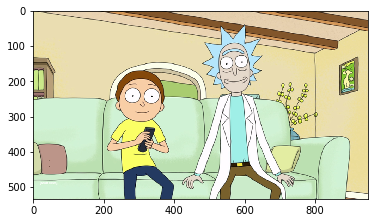

In [2]:
#Importing image from url
response = requests.get("https://i.amz.mshcdn.com/ze5SEAuSgYdquI6DVj4TBqZczWQ=/950x534/filters:quality(90)/https%3A%2F%2Fblueprint-api-production.s3.amazonaws.com%2Fuploads%2Fcard%2Fimage%2F819661%2F53880b1a-3b44-4c9c-ac68-292498049960.png")
rickimg = Image.open(BytesIO(response.content))
rick = np.asarray(rickimg)
rick.setflags(write=1)
print("Shape of image: "+ str(rick.shape))

plt.imshow(rick)

Shape of image: (534, 950)


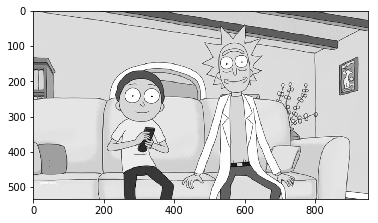

In [3]:
#Converting image to grayscale
#Each pixel get the greyscale value of 0.299*Red + 0.587*Green + 0.114*Blue.
grayRick = np.dot(rick[...,:3], [0.299, 0.587, 0.114])

print("Shape of image: "+ str(grayRick.shape))
plt.imshow(grayRick, cmap = 'gray')

Shape of image: (536, 952)


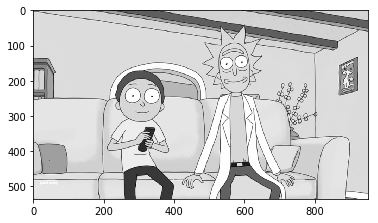

In [4]:
# Adding a padding of zeros around the image, to be able to apply the sobel filter to the pixels on the
# edges of the picture.
# From shape (534, 950) to (536, 952)
paddedRick = np.pad(grayRick, ((1,1), (1,1)), 'constant')
print("Shape of image: "+ str(paddedRick.shape))
plt.imshow(paddedRick, cmap = 'gray')

In [5]:
#creating the sobel filters
sobel_vertical = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_horizontal = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

In this stage I convolve the kernels on the padded image.
For each pixel inside the padding find the values from the two kernels.

result[i][j]=(sobel[0][0]*image[i-1][j-1]+sobel[0][1]*image[i-1][j]+...+sobel[2, 2]*image[i+1][j+1])

And then combine the absolute magnitude of the results in x- and y-direction: result = sqrt(result-
x2+result-y2), and set the pixel value to this value.


This way one would find the difference in intensity of the pixel evaluated and the neighbour pixels.
This will result in an approximation of the gradient of the image intensity. High intensity pixels of
the result image represent edges in the original picture.

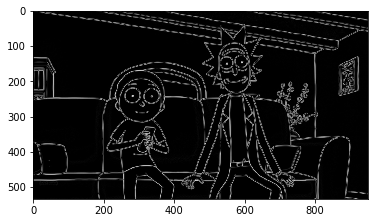

In [6]:
#applying sobel kernels
edgeRick = grayRick.copy()
for i in range(1, 535):
    for j in range(1, 951):
        Gx = 0
        Gy = 0
        for k in range(3):
            for l in range(3):
                Gx += sobel_vertical[k][l]*paddedRick[i-1+k][j-1+l]
                Gy += sobel_horizontal[k][l]*paddedRick[i-1+k][j-1+l]
        edgeRick[i-1][j-1] = sqrt(Gx**2 + Gy**2)

plt.imshow(edgeRick, cmap = 'gray')

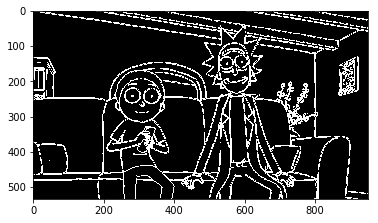

In [7]:
#removing edges below a threshold, and highlighting those above
finalRick = edgeRick.copy()
threshold = 150
for i in range(534):
    for j in range(950):
        if finalRick[i][j] > threshold:
            finalRick[i][j] = 255
        else:
            finalRick[i][j] = 0
plt.imshow(finalRick, cmap = 'gray')